# General libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image 
#import package.utilities as ut
from sklearn.model_selection import GridSearchCV
# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.utils import resample
from six import StringIO
from pydot import graph_from_dot_data
from sklearn.preprocessing import MinMaxScaler
import datetime as datetime
from pandas_datareader import data as pdr
import yfinance
import pandas_ta as ta
#from package import indicator as idr
#from package import euklid as eu
import tensorflow as tf
import seaborn as sns
import warnings
from sklearn.neighbors import KNeighborsClassifier 
warnings.filterwarnings("ignore")
%matplotlib notebook

In [1]:
# General libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Neural network libraries
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow import keras

# Machine Learning libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Visualization
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#config = tf.compat.v1.ConfigProto(device_count = {'GPU': 1})

## Preliminary work on the dataset

In [3]:
yahoo_df = pd.read_csv("../data/NSQ.csv")
#yahoo_df = yahoo_df.set_index("Date")
yahoo_df = yahoo_df.set_index("Date")


X = yahoo_df[['ROC_1', 'ROC_4', 'ROC_7', 'Momentum', '1 Day ROI', '3 Day ROI',
       '5 Day ROI', '20 Day ROI', '6_day_RSI', 'MACD_12_26', 'SRSI_30',
       'Williams_1', 'Williams_3', 'Williams_14', 'ATR_14', 'CCI']]

# Train, test, val

In [4]:

X = yahoo_df[['ROC_30', '4 Day ROI', 'EMA_12', 'MACD_12_26_9', 'SRSI_30',
       'Williams_14', 'ATR_14', 'Previous_differenced']]
y = yahoo_df["Up down"]

In [5]:
sum(y)/len(X)

0.5446124763705104

In [6]:
# Split in 80/20 the dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20, shuffle=False)

# Normalize

In [7]:
def normalize(df):
    #df = data
    for column in df:
        df[column]=((df[column]-df[column].mean())/df[column].std())
    return df

In [8]:
X_train = normalize(X_train)
X_test = normalize(X_test)


# Model ANN


In [9]:
# Set early stopping monitor so the model stops training when it won't improve anymore
esm = EarlyStopping(monitor = 'val_binary_accuracy',patience=50)

# Set the optimizer
opt = keras.optimizers.SGD(learning_rate = 0.0001)

In [10]:
metrics=[keras.metrics.Accuracy(),
    keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.49),
    keras.metrics.MeanSquaredError(name='my_mse'),
    keras.metrics.BinaryCrossentropy(),
    keras.metrics.Hinge()]

In [11]:
classifier = Sequential()
classifier.add(Dense(256,  activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(128,  activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(64,  activation = 'relu'))
classifier.add(Dense(32,  activation = 'relu'))
classifier.add(Dense(16,  activation = 'relu'))
classifier.add(Dense(8,  activation = 'relu'))
# Adding the output layer
classifier.add(Dense(1,  activation = 'relu'))

# Compiling the ANN
classifier.compile(optimizer = opt, loss = "binary_crossentropy", metrics = metrics)

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 50, epochs = 1000, validation_split = 0.10, callbacks = [esm],shuffle=False)

Epoch 1/1000
77/77 [==============================] - 2s 11ms/step - loss: 8.2553 - accuracy: 0.4648 - binary_accuracy: 0.4648 - my_mse: 0.5352 - binary_crossentropy: 8.2553 - hinge: 1.0000 - val_loss: 9.1677 - val_accuracy: 0.4057 - val_binary_accuracy: 0.4057 - val_my_mse: 0.5943 - val_binary_crossentropy: 9.1677 - val_hinge: 1.0000
Epoch 2/1000
77/77 [==============================] - 0s 3ms/step - loss: 8.2553 - accuracy: 0.4648 - binary_accuracy: 0.4648 - my_mse: 0.5352 - binary_crossentropy: 8.2553 - hinge: 1.0000 - val_loss: 9.1677 - val_accuracy: 0.4057 - val_binary_accuracy: 0.4057 - val_my_mse: 0.5943 - val_binary_crossentropy: 9.1677 - val_hinge: 1.0000
Epoch 3/1000
77/77 [==============================] - 0s 3ms/step - loss: 8.2553 - accuracy: 0.4648 - binary_accuracy: 0.4648 - my_mse: 0.5352 - binary_crossentropy: 8.2553 - hinge: 1.0000 - val_loss: 9.1677 - val_accuracy: 0.4057 - val_binary_accuracy: 0.4057 - val_my_mse: 0.5943 - val_binary_crossentropy: 9.1677 - val_hinge

77/77 [==============================] - 0s 3ms/step - loss: 0.7619 - accuracy: 0.0000e+00 - binary_accuracy: 0.4648 - my_mse: 0.2825 - binary_crossentropy: 0.7619 - hinge: 0.9749 - val_loss: 0.7862 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.4057 - val_my_mse: 0.2951 - val_binary_crossentropy: 0.7862 - val_hinge: 0.9317
Epoch 26/1000
77/77 [==============================] - 0s 3ms/step - loss: 0.7583 - accuracy: 0.0000e+00 - binary_accuracy: 0.4648 - my_mse: 0.2796 - binary_crossentropy: 0.7583 - hinge: 0.9740 - val_loss: 0.7804 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.4057 - val_my_mse: 0.2924 - val_binary_crossentropy: 0.7804 - val_hinge: 0.9306
Epoch 27/1000
77/77 [==============================] - 0s 3ms/step - loss: 0.7524 - accuracy: 0.0000e+00 - binary_accuracy: 0.4648 - my_mse: 0.2781 - binary_crossentropy: 0.7524 - hinge: 0.9739 - val_loss: 0.7749 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.4057 - val_my_mse: 0.2898 - val_binary_crossentropy: 0.7749

Epoch 49/1000
77/77 [==============================] - 0s 3ms/step - loss: 0.7046 - accuracy: 0.0000e+00 - binary_accuracy: 0.4648 - my_mse: 0.2557 - binary_crossentropy: 0.7046 - hinge: 0.9677 - val_loss: 0.7124 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.4057 - val_my_mse: 0.2596 - val_binary_crossentropy: 0.7124 - val_hinge: 0.9135
Epoch 50/1000
77/77 [==============================] - 0s 3ms/step - loss: 0.7046 - accuracy: 2.6261e-04 - binary_accuracy: 0.4648 - my_mse: 0.2556 - binary_crossentropy: 0.7046 - hinge: 0.9679 - val_loss: 0.7110 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.4057 - val_my_mse: 0.2589 - val_binary_crossentropy: 0.7110 - val_hinge: 0.9130
Epoch 51/1000
77/77 [==============================] - 0s 4ms/step - loss: 0.7045 - accuracy: 0.0000e+00 - binary_accuracy: 0.4648 - my_mse: 0.2555 - binary_crossentropy: 0.7045 - hinge: 0.9681 - val_loss: 0.7098 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.4057 - val_my_mse: 0.2583 - val_binary_crosse

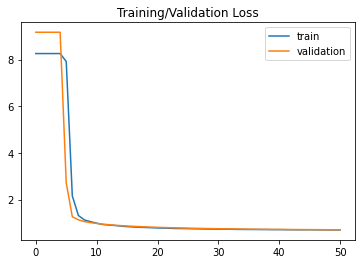

In [12]:
# Visualize the training and validation loss
plt.plot(classifier.history.history["loss"], label='train')
plt.plot(classifier.history.history['val_loss'], label='validation')
plt.legend()
#x1,y1 =plt.axis()
#plt.axis([0,0])
#plt.ylim([0.5, 0.7])
plt.title('Training/Validation Loss');
# Evaluate the model >> model.metrics_names
#print(f'{model.metrics_names}: {model.evaluate(Bitcoin_train, y_train , verbose=1)}')
plt.show()

# Save Accuracies

In [13]:
y_prob = classifier.predict(X_test)
y_pred = list(map(lambda x: 0 if x<0.5 else 1, y_prob))

In [14]:
# Computing Accuracy, Precision and Recall
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.44139886578449905


In [15]:
df_prediction = pd.read_csv("../data/model_accuracy_nsq.csv", index_col = False)
df_prediction =  df_prediction.drop(columns=["Unnamed: 0"])
df_prediction

,RF_pred,RF_accuracy,RF_prob,SVC_pred,SVC_accuracy,SVC_prob,XGB_pred,XGB_accuracy,XGB_prob
0,1,0.523629,0.657543,1,0.558601,0.544082,1,0.533081,0.536098
1,0,0.523629,0.324182,1,0.558601,0.544076,0,0.533081,0.390463
2,0,0.523629,0.496864,1,0.558601,0.545460,1,0.533081,0.552227
3,1,0.523629,0.574333,1,0.558601,0.545009,1,0.533081,0.596263
4,0,0.523629,0.421569,1,0.558601,0.543872,0,0.533081,0.483318
...,...,...,...,...,...,...,...,...,...
1053,1,0.523629,0.679418,1,0.558601,0.539406,1,0.533081,0.598255
1054,1,0.523629,0.555801,1,0.558601,0.537904,1,0.533081,0.567730
1055,1,0.523629,0.573323,1,0.558601,0.540966,1,0.533081,0.561254
1056,1,0.523629,0.719503,1,0.558601,0.536726,1,0.533081,0.590790


In [16]:
df_prediction["ANN_pred"] = y_pred
df_prediction["ANN_accuracy"] = [accuracy for x in range(len(y_pred))]
df_prediction["ANN_prob"] = y_prob

In [17]:
df_prediction

,RF_pred,RF_accuracy,RF_prob,SVC_pred,SVC_accuracy,SVC_prob,XGB_pred,XGB_accuracy,XGB_prob,ANN_pred,ANN_accuracy,ANN_prob
0,1,0.523629,0.657543,1,0.558601,0.544082,1,0.533081,0.536098,0,0.441399,0.464561
1,0,0.523629,0.324182,1,0.558601,0.544076,0,0.533081,0.390463,0,0.441399,0.464505
2,0,0.523629,0.496864,1,0.558601,0.545460,1,0.533081,0.552227,0,0.441399,0.464505
3,1,0.523629,0.574333,1,0.558601,0.545009,1,0.533081,0.596263,0,0.441399,0.464505
4,0,0.523629,0.421569,1,0.558601,0.543872,0,0.533081,0.483318,0,0.441399,0.464505
...,...,...,...,...,...,...,...,...,...,...,...,...
1053,1,0.523629,0.679418,1,0.558601,0.539406,1,0.533081,0.598255,0,0.441399,0.464011
1054,1,0.523629,0.555801,1,0.558601,0.537904,1,0.533081,0.567730,0,0.441399,0.464421
1055,1,0.523629,0.573323,1,0.558601,0.540966,1,0.533081,0.561254,0,0.441399,0.463568
1056,1,0.523629,0.719503,1,0.558601,0.536726,1,0.533081,0.590790,0,0.441399,0.464013


In [18]:
df_prediction.to_csv("../data/model_accuracy_nsq.csv")